In [170]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt

def scalar(vector1, vector2):
    assert len(vector1) == len(vector2)
    return sum(x * y for x, y in zip(vector1, vector2))

def norm(vector):
    return np.sqrt(sum(x**2 for x in vector))

def show_ort_norm(vectors):
    print("Norms:")
    for vector in vectors:
        print(norm(vector))
    print("Scalars:")
    for i in range(len(vectors) - 1):
        for j in range(i + 1, len(vectors)):
            print(scalar(vectors[i], vectors[j]))

def plot(function, x1=-10, x2=10, step=1, x = None):
    x = [x for x in range(x1, x2 + step, step)] if x is None else x
    plt.plot(x, function(np.array(x)))
    plt.show()

def eig_r2(A):
    assert len(A) == 2 and len(A[0]) == 2
    a = A[0][0]
    b = A[0][1]
    c = A[1][0]
    d = A[1][1]

    lambda1 = (a + d + ((a + d) ** 2 - 4 * (a * d - b * c)) ** 0.5) / 2
    lambda2 = (a + d - ((a + d) ** 2 - 4 * (a * d - b * c)) ** 0.5) / 2

    if b != 0:
        vector1 = [1, (lambda1 - a) / b]
        vector2 = [1, (lambda2 - a) / b]
    elif c != 0:
        vector1 = [(lambda1 - d) / c, 1]
        vector2 = [(lambda2 - d) / c, 1]
    else:
        vector1 = [1, 0]
        vector2 = [0, 1]


    print(vector1)
    print(vector2)
    vector1 = vector1 / norm(vector1)
    vector2 = vector2 / norm(vector2)
    plot_function = lambda x: x**2 - (a + d) * x + (a * d - c * b)
    return lambda1, lambda2, plot_function, [vector1, vector2]

def eig_r3(A):
    assert len(A) == 3 and len(A[0]) == 3
    a = A[0][0]
    b = A[0][1]
    c = A[0][2]
    d = A[1][0]
    e = A[1][1]
    f = A[1][2]
    g = A[2][0]
    h = A[2][1]
    i = A[2][2]

    trace = a + e + i
    det = (a * e * i + b * f * g + c * d * h) - (c * e * g + b * d * i + a * f * h)

    lambda1 = (-trace + (trace ** 2 - 3 * det) ** 0.5) / 2
    lambda2 = (-trace - (trace ** 2 - 3 * det) ** 0.5) / 2
    lambda3 = (-trace - (trace ** 2 - 3 * det) ** 0.5) / 2
    plot_function2 = lambda x:  -1 * x**3 + trace * x**2 - (a * e + a * i + e * i - c * g - f * h - b * d) * x + det

    return lambda1, lambda2, lambda3, plot_function2


In [171]:
A_2 = [
    [1, 2],
    [3, 4]
]

A_3 = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

lambda1, lambda2, plot_function1, vectors_1 = eig_r2(A_2)
print("lib:", eig(A_2))
print(lambda1, lambda2)
print(vectors_1)
print("-------")
lambda1, lambda2, lambda3, plot_function2 = eig_r3(A_3)
print("lib:", eig(A_3))
print(lambda1, lambda2, lambda3)

[1, 2.186140661634507]
[-1.457427107756338, 1]
lib: (array([-0.37228132,  5.37228132]), array([[-0.82456484, -0.41597356],
       [ 0.56576746, -0.90937671]]))
5.372281323269014 -0.3722813232690143
[array([0.41597356, 0.90937671]), array([-0.82456484,  0.56576746])]
-------
lib: (array([ 1.61168440e+01, -1.11684397e+00, -4.22209278e-16]), array([[-0.23197069, -0.78583024,  0.40824829],
       [-0.52532209, -0.08675134, -0.81649658],
       [-0.8186735 ,  0.61232756,  0.40824829]]))
0.0 -15.0 -15.0


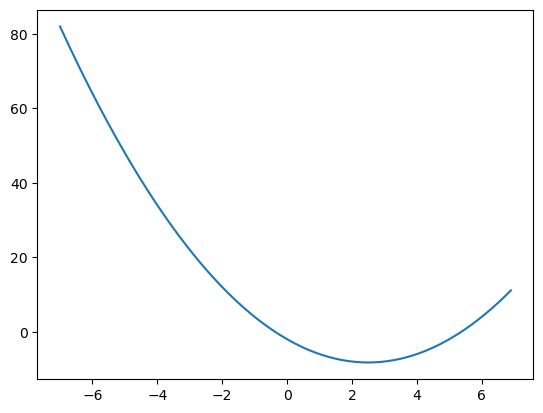

In [172]:
plot(plot_function1, x=[0.1 * i for i in range(-70, 70)])

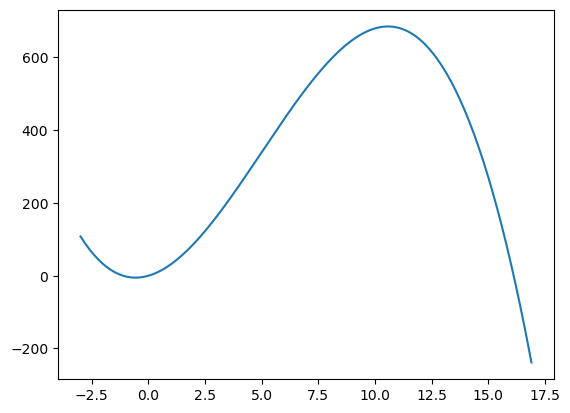

In [173]:
plot(plot_function2, x=[0.1 * i for i in range(-30, 170)])

In [174]:
show_ort_norm(vectors_1)

Norms:
1.0
1.0
Scalars:
0.17149858514250893
